In [1]:
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from textwrap import wrap
from matplotlib.font_manager import FontProperties
import re
from scipy import stats
from matplotlib.lines import Line2D 

line_size=0.5
custom_params = {
    'axes.facecolor': 'white',
    'axes.edgecolor': 'black',
    'axes.grid': False,
    'axes.axisbelow': 'line',
    'axes.labelcolor': 'black',
    'figure.facecolor': 'white',
    "axes.spines.right": True, 
    "axes.spines.bottom": True,
    'xtick.direction': 'inout',
    'ytick.direction': 'in',
    'xtick.bottom': True,
    'xtick.minor.visible': False,
    'xtick.major.bottom':  True,
    'xtick.minor.bottom':  True,
    'xtick.major.pad':     7,     # distance to major tick label in points#
    'xtick.minor.pad':     3.4,     # distance to the minor tick label in points#
    'xtick.major.size':    10,
    'ytick.major.size':    4,
    'xtick.major.width':   line_size,
    'ytick.major.width':   line_size,
    'axes.linewidth': line_size,
    'xtick.minor.size':    2,
    'pdf.fonttype': 42}

sns.set_theme(style="ticks", rc=custom_params, font="Arial",font_scale=0.7)

enmax_palette = ["#648FFF", "#FE6100", "#785EF0", "#DC267F", "#FFB000"]
sns.set_palette(palette=enmax_palette)

3.0


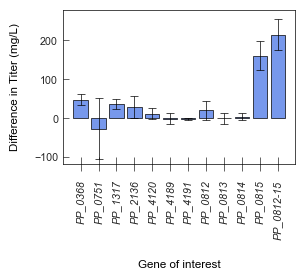

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load and prepare the data
fig = "KOs_KDs"
df = pd.read_csv('Figure_Data/250226_dCas9_Amalgam_Trunc.csv')

# Define the specific order of strains
strain_order = ['PP_0368', 'PP_0751', 'PP_1317', 'PP_2136', 'PP_4120', 'PP_4189', 'PP_4191', 'PP_0812', 'PP_0813', 'PP_0814', 'PP_0815', 'PP_0812-15']  # Add all your strains in the desired order

# Convert the 'Strain' column to a categorical type with the specified order
df['Strain'] = pd.Categorical(df['Strain'], categories=strain_order, ordered=True)

# Calculate mean and standard deviation for target and non-target values for each strain
means = df.groupby(['Strain', 'Type'])['Titer'].mean().unstack()
stds = df.groupby(['Strain', 'Type'])['Titer'].std().unstack()

# Calculate the difference and the propagated error
diffs = means['Target'] - means['Non-target']
errors = np.sqrt(stds['Target']**2 + stds['Non-target']**2)

# Create a new DataFrame for plotting
plot_data = pd.DataFrame({'Strain': strain_order, 'Difference': diffs, 'Error': errors})

# Plot the fractional differences with error bars
w = len(plot_data) / 4
print(w)
plt.figure(figsize=(w, 2))

bar_color = "#648FFF"

ax = sns.barplot(data=plot_data, x='Strain', y='Difference', color=bar_color, edgecolor="0", linewidth=line_size)

# Add error bars with caps
for i in range(len(plot_data)):
    plt.errorbar(x=i, y=plot_data['Difference'][i], yerr=plot_data['Error'][i], fmt='none', c='black', capsize=3, capthick=line_size, elinewidth=line_size, zorder=3)

# Format axes and legend
plt.xlabel('Gene of interest', labelpad=15)
plt.ylabel('Difference in Titer (mg/L)', labelpad=10)
plt.ylim(min(plot_data['Difference'] - plot_data['Error']) * 1.1, max(plot_data['Difference'] + plot_data['Error']) * 1.1)
plt.xticks(rotation='vertical', style='italic')

plt.savefig(f'Figure_Export/{fig}_Difference_Target_Non-target.pdf', dpi=1200, bbox_inches='tight')
plt.show()